# Commands to get results

```bash
cd hh_combination_fw
source setup.sh

mkdir run
cd run
cp ../configs/correlation_schemes/Legacy2022/nonres_v2.json correlation.json
cp ../configs/task_options/Legacy2022/nonres_all_v1.yaml option_all.yaml
cp ../configs/task_options/Legacy2022/nonres_mu_v1.yaml option_mu.yaml
fullwspath="/eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces"

HHComb process_channels -i ${fullwspath}/original/LegacyRun2/20240320 -c bbbb,bbtautau,bbyy,bbll,ml -n nonres --file_expr '<mX[F]>' -o output_mu --config option_mu.yaml --unblind --tasks modification,significance,limit
HHComb combine_channels -i output_mu -s correlation.json -c bbbb,bbtautau,bbyy,bbll,ml -n nonres --file_expr '<mX[F]>' --config option_mu.yaml --unblind --tasks combination,significance,limit

HHComb process_channels -i ${fullwspath}/original/LegacyRun2/20240320 -c bbbb,bbtautau,bbyy,bbll -n nonres --file_expr '<mX[F]>_kl' -o output_all --config option_all.yaml --unblind --tasks modification,likelihood,limit
HHComb combine_channels -i output_all -s correlation.json -c bbbb,bbtautau,bbyy,bbll -n nonres --file_expr '<mX[F]>_kl' --config option_all.yaml --unblind --tasks combination,likelihood,limit
```

# Plotting

In [118]:
import os
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

resonant_type = 'nonres'
status = 'int'

channel_label_map = {
    'bbbb': r"$\mathit{b\bar{b}b\bar{b}}$",
    'bbtautau': r"$\mathit{b\bar{b}\tau^+\tau^-}$",
    'bbyy': r"$\mathit{b\bar{b}\gamma\gamma}$",
    'bbll': r"$\mathit{b\bar{b}\ell\ell+E_{\mathrm{T}}^{\mathrm{miss}}}$",
    'ml': r"Multi-leptons",
    'combined': r"Combined",
}
channel_text = {
    # 'combined': r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^- + b\bar{b}\gamma\gamma + b\bar{b}b\bar{b} + b\bar{b}\ell\ell}$',
    'combined': 'HH combination',
    'bbbb': r'$\mathit{HH\rightarrow b\bar{b}b\bar{b}}$',
    'bbyy': r'$\mathit{HH\rightarrow b\bar{b}\gamma\gamma}$',
    'bbll': r'$\mathit{HH\rightarrow b\bar{b}\ell\ell+E_{\mathrm{T}}^{\mathrm{miss}}}$',
    'ml': r'$\mathit{HH\rightarrow multi-leptons$',
    'bbtautau': r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^-}$',
}
name_map = {'kl': r"$\mathrm{\kappa_{\lambda}}$", 'k2v': r"$\mathrm{\kappa_{2V}}$",
            'mu_ggF': r"$\mu_{\mathrm{ggF}}$", 'mu_VBF': r"$\mu_{\mathrm{VBF}}$"}
labels = {
    'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)',
    'observed': 'Observed limit (95% CL)'
}
default_analysis_label_options = {'loc': (0.03, 0.95),
                                  'fontsize':30, 'energy': '13 TeV', 
                                  'lumi': '126—140 fb$^{-1}$',
                                  'status': status, 'dy': 0.02, 'dy_main': 0.01}
styles_map = {
    'bbyy': {"color": "#9A0EEA", "marker": ","},
    'bbbb': {"color": 'b', "marker": ","},
    'bbtautau': {"color": "#D2691E", "marker": ","},
    'bbll': {"color": "g", "marker": ","},
    'combined': {"color": "k", "marker": ","},
}
config_map = {
    'exp': {
        'contourf_styles': {
            'colors': ["#4AD9D9", "#FDC536"],
            'alpha': 1
        },
        'fill_contour': True,
        'legend_label': 'Expected {sigma_label}',
        'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
    },
    'obs': {
        'bestfit_styles': {
            'marker': 'P',
            'linewidth': 0,
            'markersize': 15,
            'color': 'k'
        },
        'contour_styles': {
            'colors': ["k", "k"],
            'linestyles': ['solid', 'dashed'],
            'linewidths': 3
        },
        'legend_label': 'Observed {sigma_label}',
        'bestfit_label': 'Best fit',
    }
}

def remove_list(data):
    for k, v in data.items():
        for p,v_ in v.items():
            data[k][p] = v_[0]
    return data

def set_plotdir(output_dir):
    plotdir = os.path.join(output_dir, 'figures')
    if not os.path.exists(plotdir):
        os.makedirs(plotdir)
    return plotdir


<Figure size 432x288 with 0 Axes>

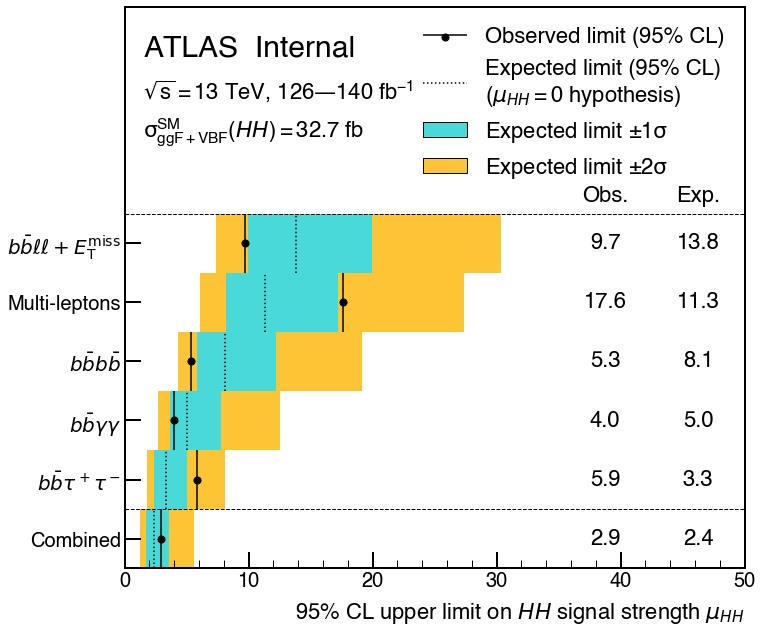

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_mu/output/figures/int/limit/limit_mu.pdf


<Figure size 432x288 with 0 Axes>

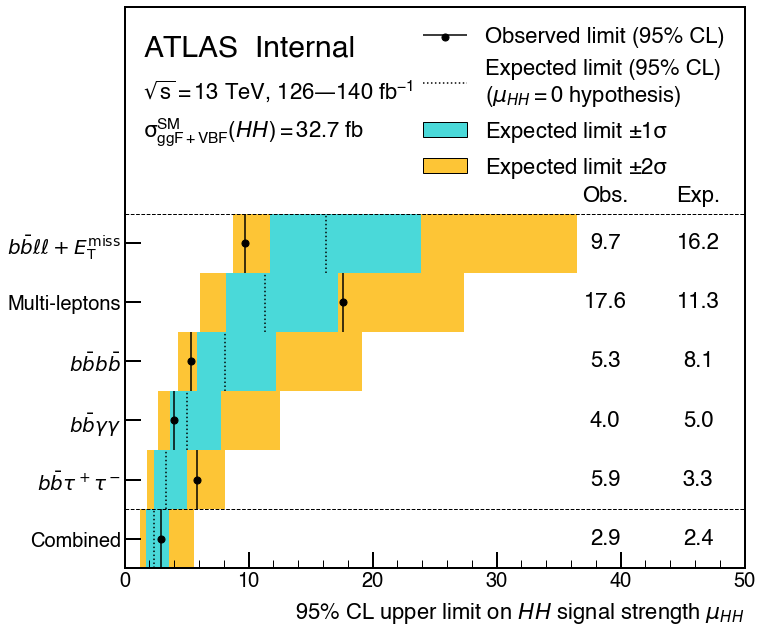

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_mu/output/figures/int/limit/limit_mu_paperbbll.pdf


In [51]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_mu/output"
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
channels = ['bbtautau', 'bbyy', 'bbbb', 'ml', 'bbll']
default_analysis_label_options['extra_text'] = r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.7$ fb'

from quickstats.plots import UpperLimit1DPlot

suffix = '_nocorr' if 'nocorr' in combine_tag else ''
plotdir = set_plotdir(output_dir)

data = {}
for c in channels + ['combined']:
    limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', 'mu', 'limits_mu.json')
    if not os.path.exists(limit_path):
        print(limit_path, 'not found')
        continue
    data[c] = json.load(open(limit_path))
data_dict = remove_list(data)
sm_limit_df = pd.DataFrame(data_dict)
filtered_order = [col for col in ['combined']+channels if col in sm_limit_df.columns]
sm_limit_df = sm_limit_df[filtered_order]

for corr_bbll in [False, True]:
    suffix += '_paperbbll' if corr_bbll else ''
    if corr_bbll:
        sm_limit_df['bbll']['obs'] = 9.7
        sm_limit_df['bbll']['0'] = 16.22732948335831
        sm_limit_df['bbll']['2'] = 36.48622687404195
        sm_limit_df['bbll']['1'] = 23.889231899314886
        sm_limit_df['bbll']['-1'] = 11.692689445118935
        sm_limit_df['bbll']['-2'] = 8.709626089177
    plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbtautau"], labels=labels,
                               analysis_label_options=default_analysis_label_options, config={'top_margin': 3.5})
    xlabel = r"95% CL upper limit on $\mathit{HH}$ signal strength $\mathit{\mu_{HH}}$"
    ax = plotter.draw(logx=False, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
    ax.set_xlim([0, 50])
    os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/limit', f"limit_mu{suffix}.pdf")
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print('Save to', filename)
    sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw_new/submodules/quickstats/quickstats/plots/upper_limit_1D_plot.py:193: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xlim[0] - (xlim[1]/0.7 - xlim[1])*0.5, xlim[1]/0.7)
/tmp/ipykernel_55082/1414661282.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1,2,5,10,20,50, 100, 200, 500, 1000, 2000])


<Figure size 432x288 with 0 Axes>

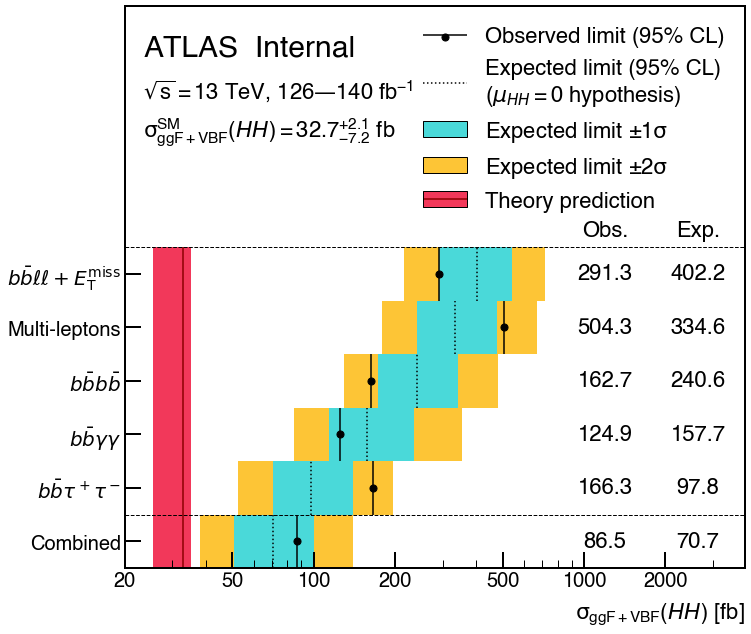

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_mu/output/figures/int/limit/limit_xsec.pdf


In [119]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run_mu/output"
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
channels = ['bbtautau', 'bbyy', 'bbbb', 'ml', 'bbll']

from quickstats.plots import UpperLimit1DPlot
from matplotlib.ticker import LogLocator

suffix = '_nocorr' if 'nocorr' in combine_tag else ''
plotdir = set_plotdir(output_dir)
default_analysis_label_options['extra_text'] = r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.7_{-7.2}^{+2.1}$ fb'

def SM_error(ggf_cv, ggf_up, ggf_dn, vbf_cv, vbf_up, vbf_dn):
    up = 1 + np.sqrt(ggf_cv*ggf_cv*ggf_up*ggf_up + vbf_cv*vbf_cv*vbf_up*vbf_up) / (ggf_cv + vbf_cv)
    dn = 1 - np.sqrt(ggf_cv*ggf_cv*ggf_dn*ggf_dn + vbf_cv*vbf_cv*vbf_dn*vbf_dn) / (ggf_cv + vbf_cv)
    return up, dn

data = {}
for c in channels + ['combined']:
    limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', 'xsec', 'limits_mu.json')
    if not os.path.exists(limit_path):
        print(limit_path, 'not found')
        continue
    data[c] = json.load(open(limit_path))
data_dict = remove_list(data)
sm_limit_df = pd.DataFrame(data_dict)
total_cross = 32.743
sm_limit_df *= total_cross
xerrhi, xerrlo = SM_error(ggf_cv=31.02, ggf_up=np.sqrt(np.square(0.03)+np.square(0.06)), ggf_dn=np.sqrt(np.square(0.03)+np.square(0.23)), vbf_cv=1.723, vbf_up=np.sqrt(np.square(0.0003)+np.square(0.021)), vbf_dn=np.sqrt(np.square(0.0004)+np.square(0.021)))
xerrhi, xerrlo = xerrhi * total_cross, xerrlo * total_cross
filtered_order = [col for col in ['combined']+channels if col in sm_limit_df.columns]
sm_limit_df = sm_limit_df[filtered_order]

plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbtautau"], labels=labels,
                           analysis_label_options=default_analysis_label_options, config={'top_margin': 4.5})
plotter.add_curve(x=total_cross, xerrlo=xerrlo, xerrhi=xerrhi, label="Theory prediction")
xlabel = r"$\sigma_{ggF+VBF}(\mathit{HH})$ [fb]"
ax = plotter.draw(logx=True, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
ax.set_xlim([20, 120*total_cross])
ax.xaxis.set_major_locator(LogLocator(base=10, subs=(1,2,5)))
ax.set_xticklabels([1,2,5,10,20,50, 100, 200, 500, 1000, 2000])
os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
filename = os.path.join(plotdir, f'{status}/limit', f"limit_xsec{suffix}.pdf")
plt.savefig(filename, bbox_inches="tight")
plt.show()
print('Save to', filename)
sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

<Figure size 432x288 with 0 Axes>

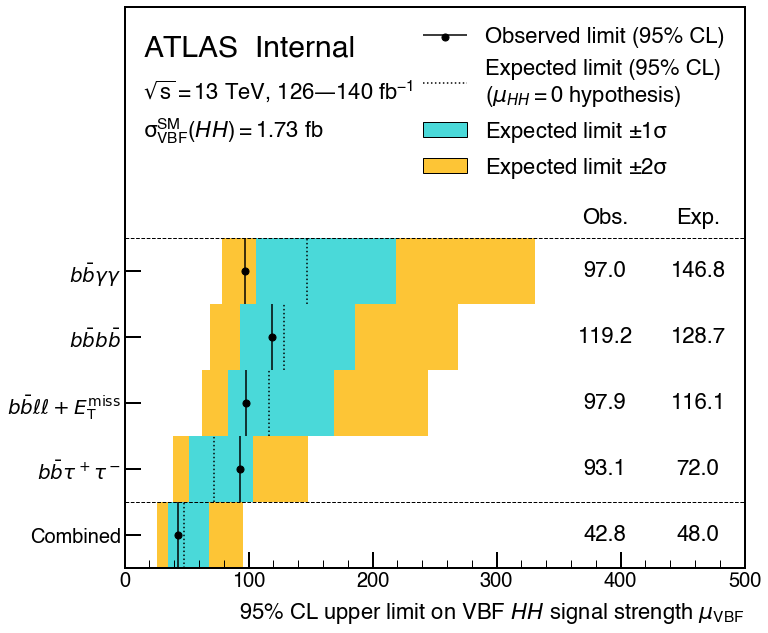

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/limit/limit_mu_VBF.pdf


<Figure size 432x288 with 0 Axes>

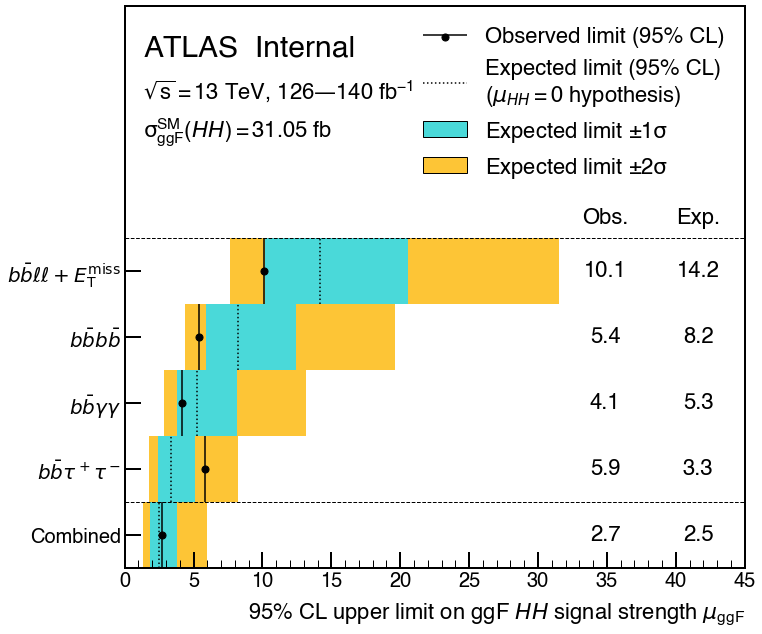

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/limit/limit_mu_ggF.pdf


In [53]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output"
combine_tag = 'bbbb_bbll_bbtautau_bbyy-fullcorr'

from quickstats.plots import UpperLimit1DPlot

suffix = '_nocorr' if 'nocorr' in combine_tag else ''
plotdir = set_plotdir(output_dir)

for mode in ['VBF', 'ggF']:
    if mode == 'VBF':
        channels = ['bbtautau', 'bbll', 'bbbb', 'bbyy']
        default_analysis_label_options['extra_text'] = r'$\sigma_{VBF}^{SM} (\mathit{HH})=1.73$ fb'
    else:
        channels = ['bbtautau', 'bbyy', 'bbbb', 'bbll']
        default_analysis_label_options['extra_text'] = r'$\sigma_{ggF}^{SM} (\mathit{HH})=31.05$ fb'
    data = {}
    for c in channels + ['combined']:
        limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', f'mu_{mode}', f'limits_mu_{mode}.json')
        if not os.path.exists(limit_path):
            print(limit_path, 'not found')
            continue
        data[c] = json.load(open(limit_path))
    data_dict = remove_list(data)
    sm_limit_df = pd.DataFrame(data_dict)
    filtered_order = [col for col in ['combined']+channels if col in sm_limit_df.columns]
    sm_limit_df = sm_limit_df[filtered_order]

    plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=[filtered_order[1]], labels=labels,
                            analysis_label_options=default_analysis_label_options, config={'top_margin': 3.5})
    xlabel = r"95% CL upper limit on "+mode+" $\mathit{HH}$ signal strength $\mathit{\mu}_{"+mode+"}$"
    ax = plotter.draw(logx=False, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
    ax.set_xlim([0, 45 if mode == 'ggF' else 500])
    os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/limit', f"limit_mu_{mode}{suffix}.pdf")
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print('Save to', filename)
    sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

kl obs bbyy 68%: [0.5375 5.2408] 95%: [-1.4407  6.9179] sigma_at_0: 1.2419417193754625
kl obs bbtautau 68%: [-1.7145  3.3037] 95%: [-3.151   9.0235] sigma_at_0: 0.01460530766308762
kl obs bbbb 68%: [0.6315 8.8198] 95%: [-3.3177 10.9854] sigma_at_0: 1.118699196520539
kl obs bbll 68%: [-2.3589  9.0027] 95%: [-6.3124 13.2648] sigma_at_0: 0.5484981839014146
kl obs combined 68%: [0.5426 5.309 ] 95%: [-0.9253  6.8087] sigma_at_0: 1.325147199916938


<Figure size 432x288 with 0 Axes>

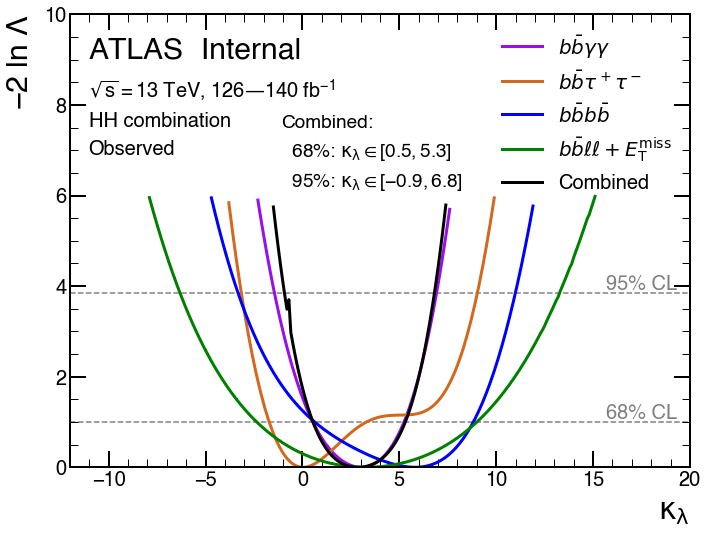

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood/likelihood_kl_obs.pdf
kl exp bbyy 68%: [-1.2114  6.0857] 95%: [-2.8475  7.8117] sigma_at_0: 0.3922090055449386
kl exp bbtautau 68%: [-1.0175  7.6241] 95%: [-2.5166  9.2238] sigma_at_0: 0.44048525429051255
kl exp bbbb 68%: [-2.9005  8.9067] 95%: [-5.2938 11.2915] sigma_at_0: 0.17311117891791483
kl exp bbll 68%: [-6.8415 12.921 ] 95%: [-10.3807  17.0724] sigma_at_0: 0.057297807422184224
kl exp combined 68%: [-0.5744  5.893 ] 95%: [-1.7775  7.4305] sigma_at_0: 0.593273814984617


<Figure size 432x288 with 0 Axes>

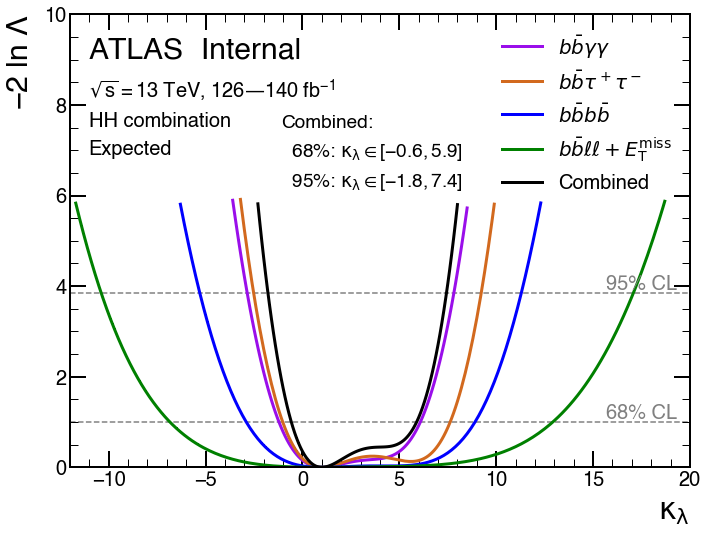

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood/likelihood_kl_exp.pdf
k2v obs bbbb 68%: [0.7898 1.239 ] 95%: [0.5483 1.4895] sigma_at_0: 3.8089670323382747
k2v obs bbtautau 68%: [-0.1342  2.2986] 95%: [-0.5138  2.6795] sigma_at_0: 0.6863239577270824
k2v obs bbll 68%: [0.3622 1.798 ] 95%: [-0.19  2.35] sigma_at_0: 1.6103154258478898
k2v obs bbyy 68%: [0.2727 1.9274] 95%: [-0.4763  2.6775] sigma_at_0: 1.342693462397905
k2v obs combined 68%: [0.7962 1.2384] 95%: [0.5727 1.4797] sigma_at_0: 4.279741486665509


<Figure size 432x288 with 0 Axes>

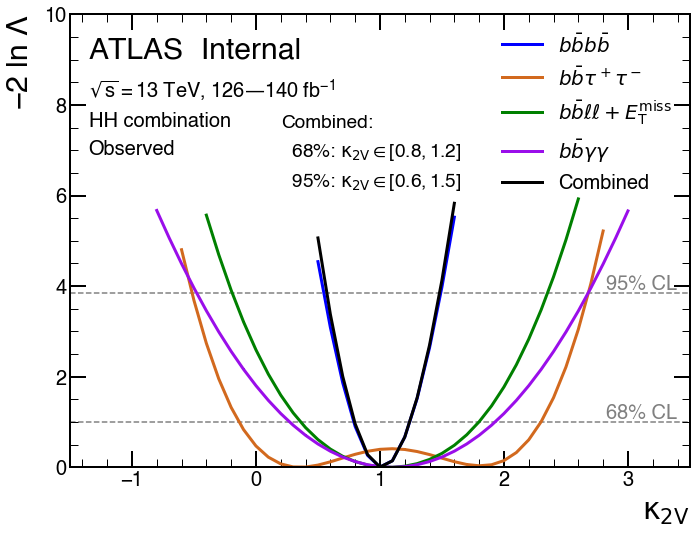

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood/likelihood_k2v_obs.pdf
k2v exp bbbb 68%: [0.6337 1.4013] 95%: [0.3837 1.6526] sigma_at_0: 3.35281664713176
k2v exp bbtautau 68%: [0.1708 2.0047] 95%: [-0.2437  2.4173] sigma_at_0: 1.3625628513030819
k2v exp bbll 68%: [0.0307 2.1393] 95%: [-0.504   2.6741] sigma_at_0: 1.0468048498773193
k2v exp bbyy 68%: [-0.344   2.5437] 95%: [-1.1254  3.3269] sigma_at_0: 0.6224450691100325
k2v exp combined 68%: [0.6414 1.4039] 95%: [0.411  1.6447] sigma_at_0: 3.7543004571512384


<Figure size 432x288 with 0 Axes>

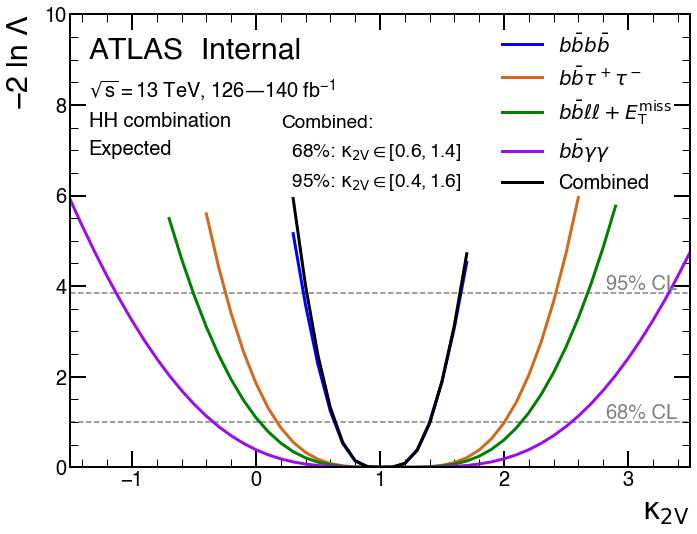

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood/likelihood_k2v_exp.pdf


In [120]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output"
combine_tag = 'bbbb_bbll_bbtautau_bbyy-fullcorr'
plotdir = set_plotdir(output_dir)

from quickstats.maths.interpolation import get_intervals
from quickstats.plots import Likelihood1DPlot
ylabel = r"$-2\ ln\ \Lambda$"
xrange = {'kl': (-12, 20),'k2v': (-1.5, 3.5)}
styles = { 'legend': {'loc': 'upper right'},
           'xlabel': {'fontsize': 30},
           'ylabel': {'fontsize': 30},
           'plot': {'linewidth': 3}}
anno_op = {'x': 0.34, 'y': 0.75, 'dy': 0.065, 'font_size': 19}

for v in ['kl','k2v']:
    if v=='kl':
        channels = ['bbyy', 'bbtautau', 'bbbb', 'bbll']
    else:
        channels = ['bbbb', 'bbtautau', 'bbll', 'bbyy']
    for o in ['obs','exp']:
        default_analysis_label_options['extra_text'] = channel_text['combined'] + '//' + ('Observed' if o == 'obs' else 'Expected')
        data = {}
        for c in channels + ['combined']:
            likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
            if not os.path.exists(likelihood_path):
                print(likelihood_path, 'not exist')
                continue
            data[c] = json.load(open(likelihood_path))
        likelihood_df = {}
        uncond_df = {}
        likelihood_df_orig = {}
        for c in data:
            df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
            uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
            df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
            likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
            likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>6].index)
        plotter = Likelihood1DPlot(likelihood_df, label_map=channel_label_map, styles_map=styles_map, styles=styles,
                                   analysis_label_options=default_analysis_label_options, config={'errorband_legend': True})
        ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
        dic = {}
        for c in channels + ['combined']:
            dic[c] = {}
            if c not in likelihood_df: continue
            intersections_1 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=1, delta=0.0001)[0]
            intersections_2 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=3.84, delta=0.0001)[0]
            sigma_at_0 = likelihood_df_orig[c][likelihood_df_orig[c][v] == 0]['qmu'].values[0]
            dic[c]['68% low'], dic[c]['68% high'] = intersections_1
            dic[c]['95% low'], dic[c]['95% high'] = intersections_2
            dic[c]['sigma_at_0'] = np.sqrt(sigma_at_0)
            if c == 'combined':
                ax.annotate(r'Combined:', 
                            (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                ax.annotate(r'  $68\%$: '+name_map[v]+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
                            (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                ax.annotate(r'  $95\%$: '+name_map[v]+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
                            (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
            print(v, o, c, '68%:', intersections_1, '95%:', intersections_2, 'sigma_at_0:', dic[c]['sigma_at_0'])
        os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
        filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}_{o}.pdf")
        plt.savefig(filename, bbox_inches="tight")
        plt.show()
        print('Save to', filename)
        dic = json.dumps(dic, indent=4, separators=(',', ': '))
        with open(filename.replace('.pdf','.json'), 'w') as json_file:
            json_file.write(dic)


bbll obs -6.825752671715433 13.645869863717307
bbll exp -8.343651939753405 15.211491740415777
bbbb obs -3.8166588585893426 10.938618986581247
bbbb exp -4.611422011153685 10.749447937057866
bbtautau obs -2.7839377120048887 9.108226859340984
bbtautau exp -1.4322835474714584 8.253639822006246
bbyy obs -1.522521773676965 6.924239645584231
bbyy exp -2.03784253351101 7.254465810273103
combined obs -0.7985487412924146 6.769221925720266
combined exp -0.6114295144266262 6.665889406879613
save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/limit_scan/limit_scan_kl.pdf


<Figure size 432x288 with 0 Axes>

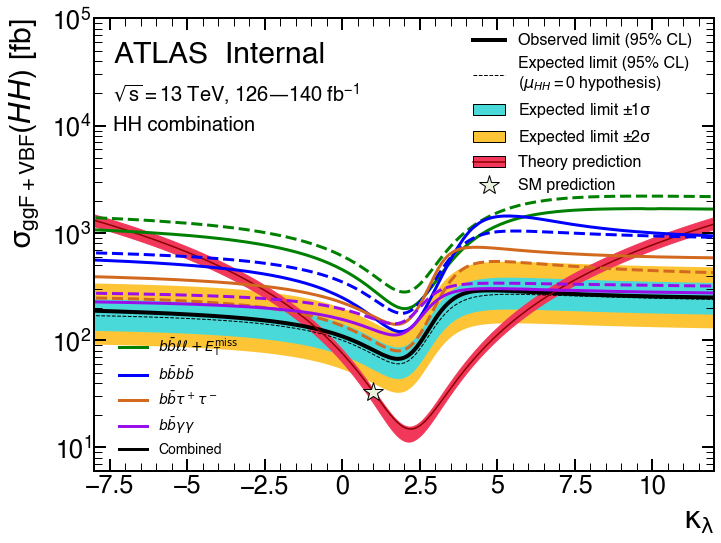

In [134]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output"
combine_tag = 'bbbb_bbll_bbtautau_bbyy-fullcorr'
do_individual = True
plotdir = set_plotdir(output_dir)
scan_poi = 'kl'
channels = ['bbll','bbbb','bbtautau','bbyy']
default_analysis_label_options['extra_text'] = channel_text['combined']

from quickstats.plots import UpperLimit2DPlot
import matplotlib.lines as mlines

config = {'observed_plot_styles': {'marker': None, 'alpha': 1, 'linewidth': 4}}
styles = {'legend':{'loc': (0.6, 0.6),
                    'fontsize': 16},
          'axis':{'tick_bothsides': True,
                  'major_length': 12,
                  'labelsize': 25},
          'xlabel': {'fontsize': 30},
          'ylabel': {'fontsize': 30}}
def theory_cross_section(kl):
    xs_ggF = (70.3874-50.4111*kl+11.0595*np.square(kl))*31.05/31.0358
    xs_ggF_up = xs_ggF * np.sqrt(np.square((np.maximum(76.6075 - 56.4818*kl + 12.635*np.square(kl), 75.4617 - 56.3164*kl + 12.7135*np.square(kl)) * 31.05/31.0358 / xs_ggF - 1)) + 0.03**2)
    xs_ggF_down = xs_ggF * np.sqrt(np.square((np.minimum(57.6809 - 42.9905*kl + 9.58474*np.square(kl), 58.3769 - 43.9657*kl + 9.87094*np.square(kl)) * 31.05/31.0358 / xs_ggF - 1)) + 0.03**2)
    xs_VBF = (4.581-4.245*kl+1.359*np.square(kl))*1.726/(4.581-4.245+1.359)
    xs_VBF_up = xs_VBF * np.sqrt(0.0003**2 + 0.021**2)
    xs_VBF_down = xs_VBF * np.sqrt(0.0004**2 + 0.021**2)
    xs_HH = xs_ggF + xs_VBF
    xs_HH_up = np.sqrt(np.square(xs_ggF_up) + np.square(xs_VBF_up))
    xs_HH_down = np.sqrt(np.square(xs_ggF_down) + np.square(xs_VBF_down))
    return kl, xs_HH, xs_HH+xs_HH_up, xs_HH-xs_HH_down
def get_intersections(kl, xsec, kl_dense, theory_xsec_dense):
    interpolated_limit = np.interp(kl_dense, kl, xsec)
    limitm = interpolated_limit - theory_xsec_dense 
    idx = np.argwhere(np.diff(np.sign(limitm))).flatten()
    intersections = [kl_dense[x] - (kl_dense[x+1] - kl_dense[x])/(limitm[x+1] - limitm[x]) * limitm[x] for x in idx]
    return intersections

dfs = {}
for c in channels + ['combined']:
    limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c=='combined' else '', f'xsec_{scan_poi}', 'limits_mu.json')
    data = json.load(open(limit_path))
    dfs[c] = pd.DataFrame(data).dropna().set_index([scan_poi])
poi_values =  dfs['combined'].index.astype(float).values
poi_values_dense = np.linspace(min(poi_values), max(poi_values), 200000) 
poi_values_dense, theory_xs_dense, theory_xs_upper_dense, theory_xs_lower_dense = theory_cross_section(poi_values_dense)
plotter = UpperLimit2DPlot(dfs['combined'], labels=labels,
                           theory_func=theory_cross_section, config=config, styles=styles,
                           analysis_label_options=default_analysis_label_options)
plotter.add_curve(poi_values_dense, theory_xs_dense, theory_xs_lower_dense, theory_xs_upper_dense, label="Theory prediction")
plotter.add_highlight(1, theory_cross_section(1)[1], label="SM prediction")
ax = plotter.draw(xlabel=name_map[scan_poi], ylabel=r"$\sigma_{ggF+VBF}(\mathit{HH})$ [fb]",scale_theory=True, draw_theory_curve=True, 
                  draw_observed=True, logy=True, ylim=[6,1e5], xlim=[-8, 12], draw_errorband=True)
if do_individual:
    handels = []
    handel_labels = []
    dic = {}
    for c in dfs.keys():
        data = dfs[c]
        indices = data.index.astype(float).values
        x0, y0, xh, xl = theory_cross_section(indices)
        exp_limits = data['0'].values * y0
        obs_limits = data['obs'].values * y0
        color = 'k' if c=='combined' else styles_map[c]['color']
        if c != 'combined':
            ax.semilogy(x0, exp_limits, color=color, linestyle='--', linewidth=3, alpha=1)
            ax.semilogy(x0, obs_limits, color=color, linestyle='-', linewidth=3)
        handels.append(mlines.Line2D([], [], color=color, linewidth=3))
        handel_labels.append(channel_label_map[c])
        intersections = get_intersections(x0, exp_limits, poi_values_dense, theory_xs_dense)
        intersections_obs = get_intersections(x0, obs_limits, poi_values_dense, theory_xs_dense)
        print(c, 'obs', intersections_obs[0], intersections_obs[1])
        print(c, 'exp', intersections[0], intersections[1])
        dic[c] = {'exp low': intersections[0], 'exp high': intersections[1],
                  'obs low': intersections_obs[0], 'obs high': intersections_obs[1]}
    ax.add_artist(ax.get_legend())
    ax.legend(handels, handel_labels, loc=(0.03, 0.02), fontsize=14)
suffix = '_noindiv' if not do_individual else ''
os.makedirs(os.path.join(plotdir, f'{status}/limit_scan'), exist_ok=True)
filename = os.path.join(plotdir, f'{status}/limit_scan', f"limit_scan_{scan_poi}{suffix}.pdf")
plt.savefig(filename, bbox_inches="tight")
print("save to", filename)
plt.show()
dic = json.dumps(dic, indent=4, separators=(',', ': '))
with open(filename.replace('.pdf','.json'), 'w') as json_file:
    json_file.write(dic)

bbll obs -0.2760825788315904 2.4398862870968414
bbll exp -0.4664022755632929 2.637035536314091
bbbb obs 0.49303123248865455 1.5445513134819167
bbbb exp 0.38092920351102755 1.658252147337464
bbtautau obs -0.4447743187477739 2.6120221228101372
bbtautau exp -0.2414923080944806 2.4142834339518666
bbyy obs -0.6533167335372254 2.8543566899281494
bbyy exp -1.0963956024805017 3.2976796751430424
combined obs 0.5212335816606767 1.5328129065438343
combined exp 0.4133518483938816 1.6443199805043
save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/limit_scan/limit_scan_k2v.pdf


<Figure size 432x288 with 0 Axes>

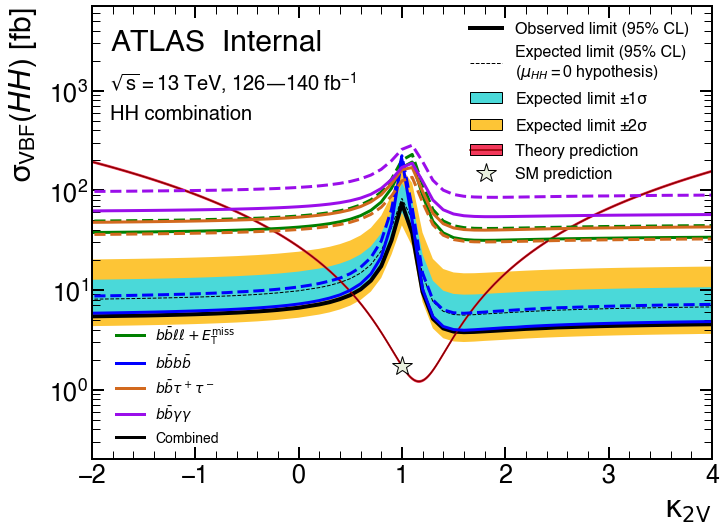

In [164]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output"
combine_tag = 'bbbb_bbll_bbtautau_bbyy-fullcorr'
do_individual = True
plotdir = set_plotdir(output_dir)
scan_poi = 'k2v'
channels = ['bbll','bbbb','bbtautau','bbyy']
default_analysis_label_options['extra_text'] = channel_text['combined']

from quickstats.plots import UpperLimit2DPlot
import matplotlib.lines as mlines
import sympy

config = {'observed_plot_styles': {'marker': None, 'alpha': 1, 'linewidth': 4}}
styles = {'legend':{'loc': (0.6, 0.6),
                    'fontsize': 16},
          'axis':{'tick_bothsides': True,
                  'major_length': 12,
                  'labelsize': 25},
          'xlabel': {'fontsize': 30},
          'ylabel': {'fontsize': 30}}

def theory_cross_section(k2v):
    basis_list = [
        # ([k2v, kl, kv], xsec)
        ([1, 1, 1], 1.18),
        ([1.5, 1, 1], 2.30),
        ([2, 1, 1], 9.97),
        ([1, 0, 1], 3.17),
        ([1, 10, 1], 67.4),
        ([1, 1, 1.5], 45.4),
    ]
    xsec_correction = 1.726/1.18
    theory_basis_list, xsec_list = zip(*basis_list)
    corrected_xsecs = [xsec * xsec_correction for xsec in xsec_list]
    basis_states = [[sympy.Rational(param) for param in basis] for basis in theory_basis_list]
    _k2v = sympy.Symbol("\kappa_{2V}")
    _kl = sympy.Symbol("\kappa_{\lambda}")
    _kv = sympy.Symbol("\kappa_{V}")
    diagram_term_list = [
            lambda k2v, kl, kv: kv ** 2 * kl ** 2,
            lambda k2v, kl, kv: kv ** 4,
            lambda k2v, kl, kv: k2v ** 2,
            lambda k2v, kl, kv: kv ** 3 * kl,
            lambda k2v, kl, kv: k2v * kl * kv,
            lambda k2v, kl, kv: kv ** 2 * k2v,
    ]
    combination_matrix = sympy.Matrix([[term(*base) for term in diagram_term_list] for base in basis_states])
    inversion = combination_matrix.inv()
    term_vector = sympy.Matrix([[term(_k2v, _kl, _kv)] for term in diagram_term_list])
    amplitudes = sympy.Matrix([sympy.Symbol(f"A{n}") for n in np.arange(len(diagram_term_list))])
    final_amplitude = (term_vector.T * inversion * amplitudes)[0]
    amplitude_function = sympy.lambdify([_k2v, _kl, _kv] + [*amplitudes], final_amplitude, "numpy")
    theory_combination_function = lambda couplings: amplitude_function(*couplings, *corrected_xsecs)
    theory_xs_values = theory_combination_function((np.array(k2v), 1, 1))
    return k2v, theory_xs_values, theory_xs_values*(1+np.sqrt(0.0003**2 + 0.021**2)), theory_xs_values*(1-np.sqrt(0.0004**2 + 0.021**2))
def get_intersections(k2v, xsec, k2v_dense, theory_xsec_dense):
    interpolated_limit = np.interp(k2v_dense, k2v, xsec)
    limitm = interpolated_limit - theory_xsec_dense 
    idx = np.argwhere(np.diff(np.sign(limitm))).flatten()
    intersections = [k2v_dense[x] - (k2v_dense[x+1] - k2v_dense[x])/(limitm[x+1] - limitm[x]) * limitm[x] for x in idx]
    return intersections

dfs = {}
for c in channels + ['combined']:
    limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c=='combined' else '', f'xsec_{scan_poi}'+('_tmp' if c=='combined' else ''), 'limits_mu_VBF.json')
    data = json.load(open(limit_path))
    dfs[c] = pd.DataFrame(data).dropna().set_index([scan_poi])
poi_values =  dfs['combined'].index.astype(float).values
poi_values_dense = np.linspace(min(poi_values), max(poi_values), 200000) 
poi_values_dense, theory_xs_dense, theory_xs_upper_dense, theory_xs_lower_dense = theory_cross_section(poi_values_dense)
plotter = UpperLimit2DPlot(dfs['combined'], labels=labels,
                           theory_func=theory_cross_section, config=config, styles=styles,
                           analysis_label_options=default_analysis_label_options)
plotter.add_curve(poi_values_dense, theory_xs_dense, theory_xs_lower_dense, theory_xs_upper_dense, label="Theory prediction")
plotter.add_highlight(1, theory_cross_section(1)[1], label="SM prediction")
ax = plotter.draw(xlabel=name_map[scan_poi], ylabel=r"$\sigma_{VBF}(\mathit{HH})$ [fb]",scale_theory=True, draw_theory_curve=True, 
                  draw_observed=True, logy=True, ylim=[0.2,7e3], xlim=[-2, 4], draw_errorband=True)
if do_individual:
    handels = []
    handel_labels = []
    dic = {}
    for c in dfs.keys():
        data = dfs[c]
        indices = data.index.astype(float).values
        x0, y0, xh, xl = theory_cross_section(indices)
        exp_limits = data['0'].values * y0
        obs_limits = data['obs'].values * y0
        color = 'k' if c=='combined' else styles_map[c]['color']
        if c != 'combined':
            ax.semilogy(x0, exp_limits, color=color, linestyle='--', linewidth=3, alpha=1)
            ax.semilogy(x0, obs_limits, color=color, linestyle='-', linewidth=3)
        handels.append(mlines.Line2D([], [], color=color, linewidth=3))
        handel_labels.append(channel_label_map[c])
        intersections = get_intersections(x0, exp_limits, poi_values_dense, theory_xs_dense)
        intersections_obs = get_intersections(x0, obs_limits, poi_values_dense, theory_xs_dense)
        print(c, 'obs', intersections_obs[0], intersections_obs[1])
        print(c, 'exp', intersections[0], intersections[1])
        dic[c] = {'exp low': intersections[0], 'exp high': intersections[1],
                  'obs low': intersections_obs[0], 'obs high': intersections_obs[1]}
    ax.add_artist(ax.get_legend())
    ax.legend(handels, handel_labels, loc=(0.03, 0.02), fontsize=14)
suffix = '_noindiv' if not do_individual else ''
os.makedirs(os.path.join(plotdir, f'{status}/limit_scan'), exist_ok=True)
filename = os.path.join(plotdir, f'{status}/limit_scan', f"limit_scan_{scan_poi}{suffix}.pdf")
plt.savefig(filename, bbox_inches="tight")
print("save to", filename)
plt.show()
dic = json.dumps(dic, indent=4, separators=(',', ': '))
with open(filename.replace('.pdf','.json'), 'w') as json_file:
    json_file.write(dic)

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood_2d/likelihood_kl_k2v_bbyy.pdf


<Figure size 432x288 with 0 Axes>

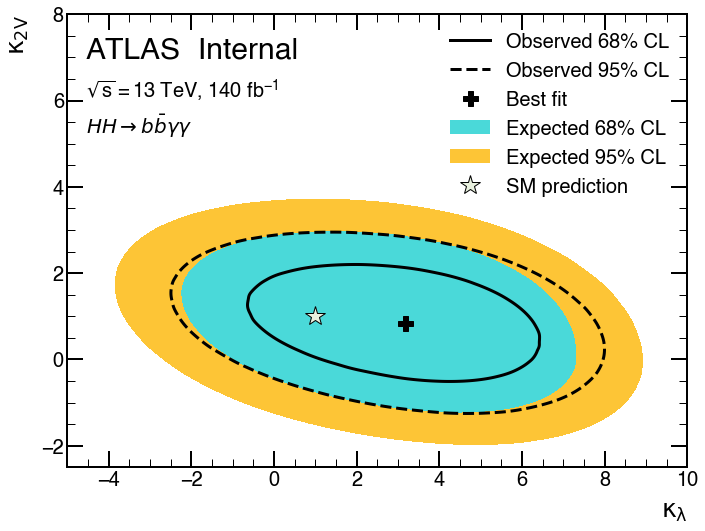

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood_2d/likelihood_kl_k2v_bbtautau.pdf


<Figure size 432x288 with 0 Axes>

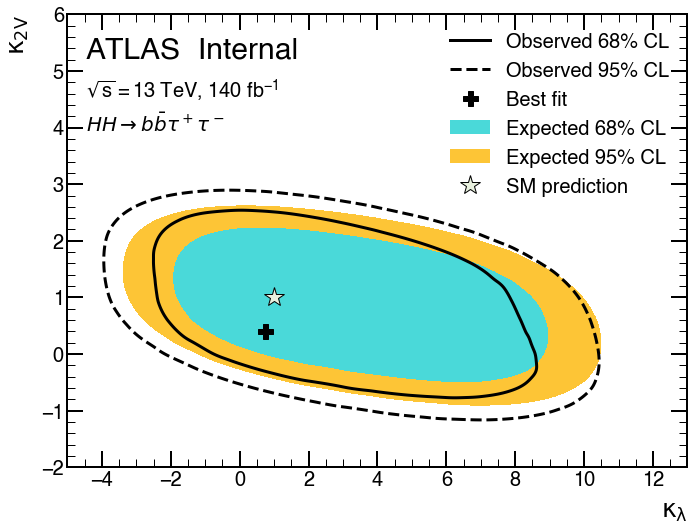

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood_2d/likelihood_kl_k2v_bbbb.pdf


<Figure size 432x288 with 0 Axes>

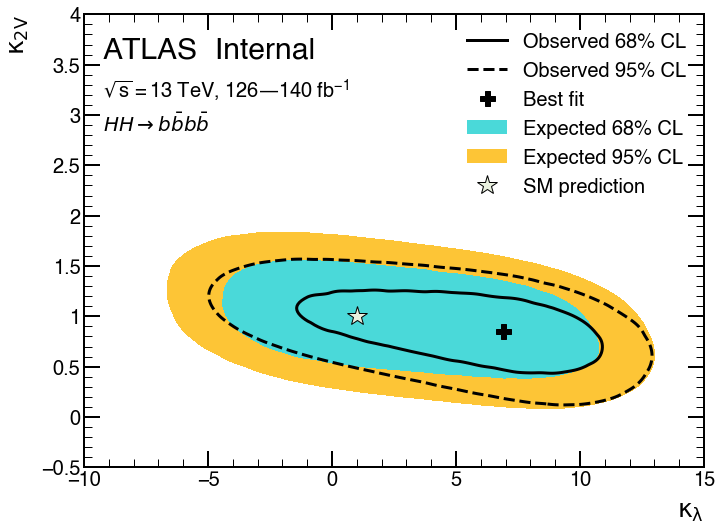

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood_2d/likelihood_kl_k2v_bbll.pdf


<Figure size 432x288 with 0 Axes>

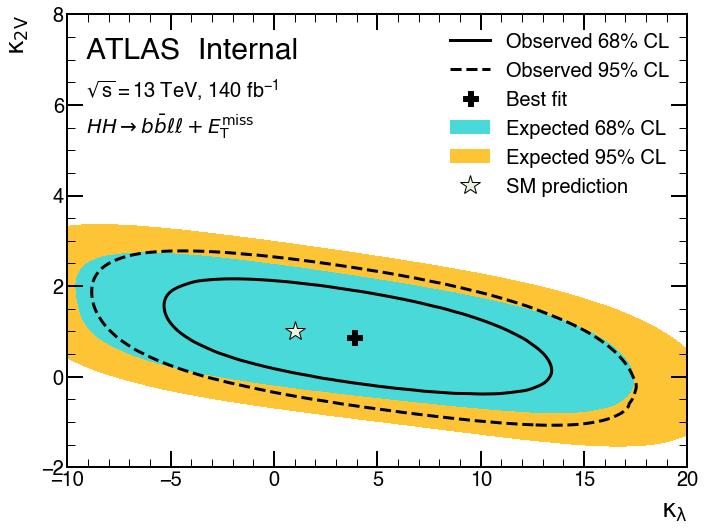

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood_2d/likelihood_kl_k2v_combined.pdf


<Figure size 432x288 with 0 Axes>

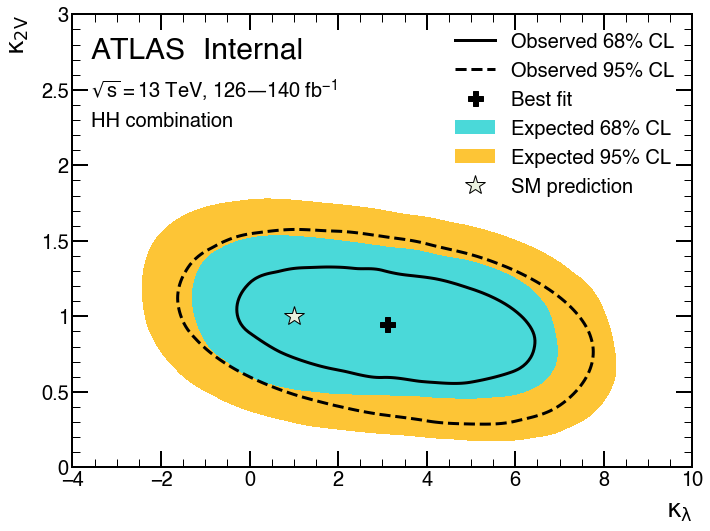

In [88]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output"
combine_tag = 'bbbb_bbll_bbtautau_bbyy-fullcorr'
params = ('kl', 'k2v')
plotdir = set_plotdir(output_dir)

from quickstats.plots import Likelihood2DPlot
channels = ['bbyy', 'bbtautau', 'bbbb', 'bbll'] + ['combined']
ranges = {'bbbb': {'xmin': -10, 'xmax': 15, 'ymin': -0.5, 'ymax': 4},
          'bbtautau': {'xmin': -5, 'xmax': 13, 'ymin': -2, 'ymax': 6},
          'bbyy': {'xmin': -5, 'xmax': 10, 'ymin': -2.5, 'ymax': 8},
          'bbll': {'xmin': -10, 'xmax': 20, 'ymin': -2, 'ymax': 8},
          'combined': {'xmin': -4, 'xmax': 10, 'ymin': 0, 'ymax': 3}}
styles = {'xlabel': {'fontsize': 25},
          'ylabel': {'fontsize': 25}}

for c in channels:
    rangec = ranges[c]
    analysis_label_options = default_analysis_label_options
    analysis_label_options['extra_text'] = channel_text[c]
    if c in ['bbll','bbyy','bbtautau']: analysis_label_options['lumi'] = '140 fb$^{-1}$'
    else: analysis_label_options['lumi'] = '126—140 fb$^{-1}$'
    dfs = {}
    data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['obs'] = pd.DataFrame(data_obs)
    data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['exp'] = pd.DataFrame(data_exp)
    plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
                               analysis_label_options=analysis_label_options)
    plotter.add_highlight(1, 1, label="SM prediction")
    ax = plotter.draw(xattrib=params[0], yattrib=params[1],
                      targets=['obs','exp'],
                      xlabel=name_map[params[0]],
                      ylabel=name_map[params[1]],
                      draw_bestfit=['obs'],
                      interval_format='68_95',**rangec)
    os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_{c}.pdf")
    print('Save to', filename)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()


Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood_2d/likelihood_mu_ggF_mu_VBF_bbyy.pdf


<Figure size 432x288 with 0 Axes>

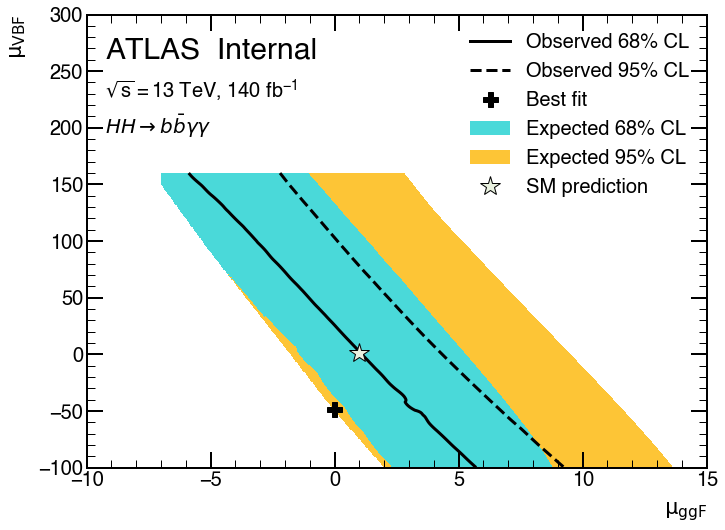

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood_2d/likelihood_mu_ggF_mu_VBF_bbtautau.pdf


<Figure size 432x288 with 0 Axes>

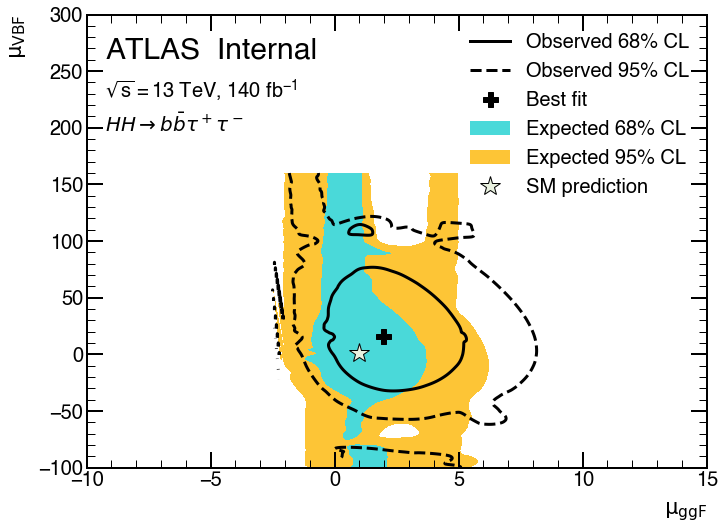

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood_2d/likelihood_mu_ggF_mu_VBF_bbbb.pdf


<Figure size 432x288 with 0 Axes>

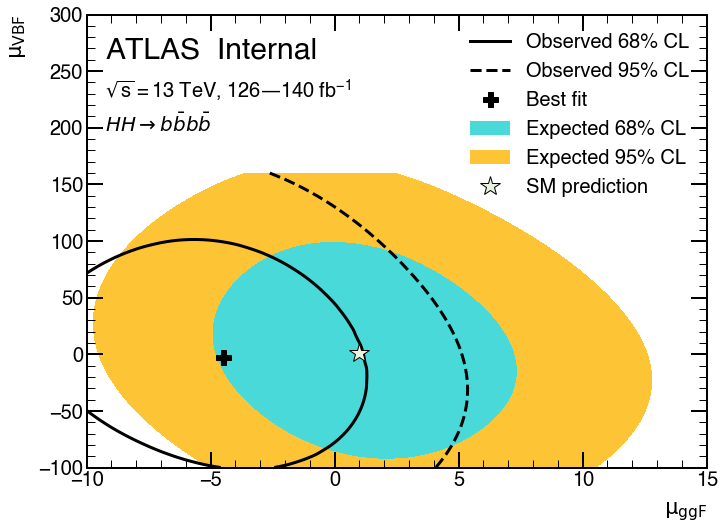

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood_2d/likelihood_mu_ggF_mu_VBF_bbll.pdf


<Figure size 432x288 with 0 Axes>

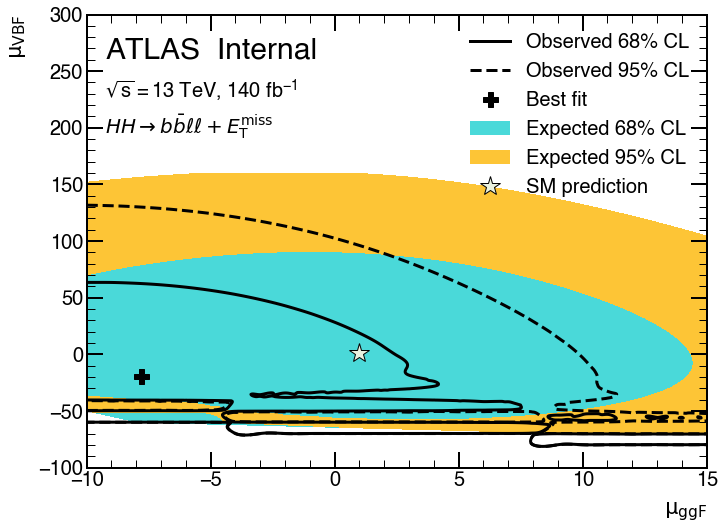

Save to /afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output/figures/int/likelihood_2d/likelihood_mu_ggF_mu_VBF_combined.pdf


<Figure size 432x288 with 0 Axes>

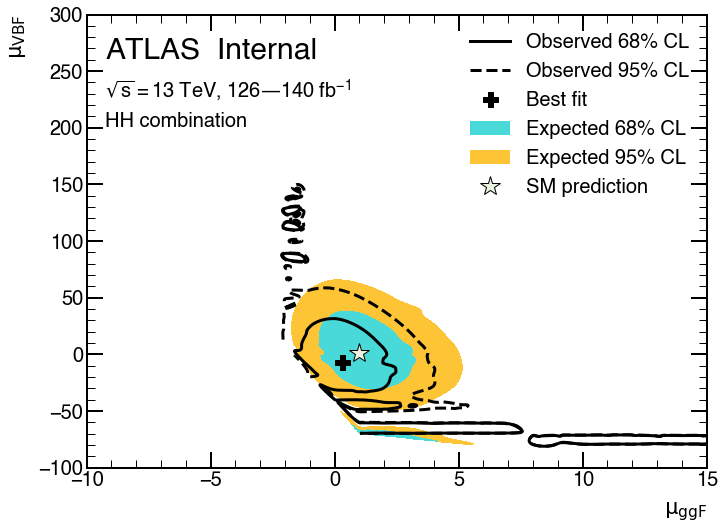

In [87]:
output_dir = "/afs/desy.de/user/c/caiyi/dust/HH_comb/hh_combination_fw_new/run/output"
combine_tag = 'bbbb_bbll_bbtautau_bbyy-fullcorr'
params = ('mu_ggF', 'mu_VBF')
plotdir = set_plotdir(output_dir)

from quickstats.plots import Likelihood2DPlot
channels = ['bbyy', 'bbtautau', 'bbbb', 'bbll'] + ['combined']
styles = {'xlabel': {'fontsize': 25},
          'ylabel': {'fontsize': 25}}

for c in channels:
    rangec = {'xmin': -10, 'xmax': 15, 'ymin': -100, 'ymax': 300}
    analysis_label_options = default_analysis_label_options
    analysis_label_options['extra_text'] = channel_text[c]
    if c in ['bbll','bbyy','bbtautau']: analysis_label_options['lumi'] = '140 fb$^{-1}$'
    else: analysis_label_options['lumi'] = '126—140 fb$^{-1}$'
    dfs = {}
    data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[1].replace("_","")}_{params[0].replace("_","")}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['obs'] = pd.DataFrame(data_obs)
    dfs['obs'] = dfs['obs'][dfs['obs']['status'] == 0]
    data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[1].replace("_","")}_{params[0].replace("_","")}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['exp'] = pd.DataFrame(data_exp)
    dfs['exp'] = dfs['exp'][dfs['exp']['status'] == 0]
    plotter = Likelihood2DPlot(dfs, config_map=config_map,
                               analysis_label_options=analysis_label_options)
    plotter.add_highlight(1, 1, label="SM prediction")
    ax = plotter.draw(xattrib=params[0], yattrib=params[1],
                      targets=['obs','exp'],
                      xlabel=name_map[params[0]],
                      ylabel=name_map[params[1]],
                      draw_bestfit=['obs'],
                      interval_format='68_95',**rangec)
    os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_{c}.pdf")
    print('Save to', filename)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
